In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

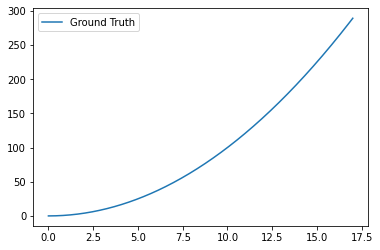

In [2]:
num_data = 500

X = np.linspace(0,17,num_data)
y = X**2

plt.plot(X,y, label = "Ground Truth")
plt.legend()
plt.show()

In [3]:
X_train = X.reshape(-1,1)
y_train = y

In [14]:
n_estimators = 100
max_depth = 1

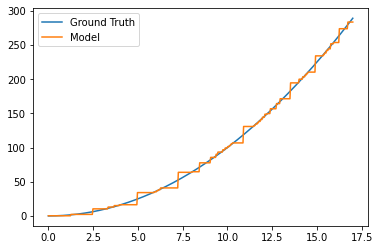

In [15]:
model = GradientBoostingRegressor(max_depth = max_depth, 
                                  n_estimators = n_estimators, 
                                  learning_rate = 1)
model.fit(X_train, y_train)

plt.plot(X,y, label = "Ground Truth")
plt.plot(X_train, model.predict(X_train), label = "Model")

plt.legend()
plt.show()

# Vamos a hacer boosting paso a paso

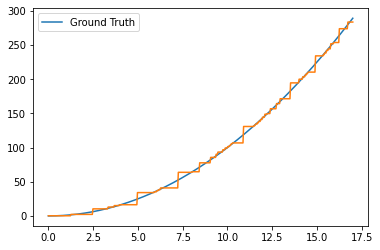

In [16]:
lista_modelos = []
lista_predicciones = []
lista_residuos = []

residuo = y_train.copy()
for iter in range(n_estimators):
    

    aux_model = DecisionTreeRegressor(max_depth = max_depth)
    aux_model.fit(X_train,residuo)
    predicciones = aux_model.predict(X_train)
    residuo = residuo - predicciones 
    
    lista_modelos.append(aux_model)
    lista_predicciones.append(predicciones)
    lista_residuos.append(residuo)    
    
plt.plot(X,y, label = "Ground Truth")
plt.plot(X,np.array(lista_predicciones).sum(axis = 0))
plt.legend()
plt.show()

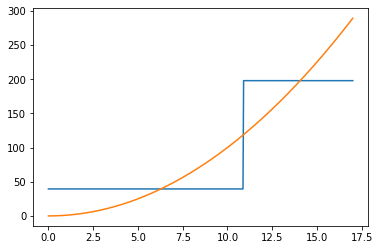

In [22]:
plt.plot(X,lista_predicciones[0])
plt.plot(X,y, label = "Ground Truth")
plt.show()

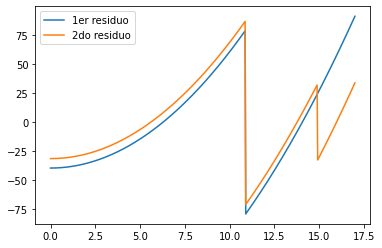

In [30]:
plt.plot(X,lista_residuos[0], label = "1er residuo")
plt.plot(X,lista_residuos[1], label = "2do residuo")

plt.legend()

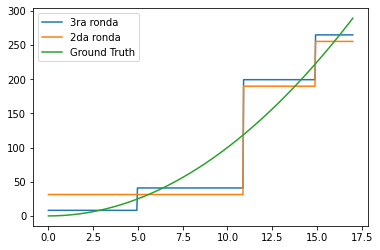

In [33]:
plt.plot(X,lista_predicciones[0] + lista_predicciones[1] + lista_predicciones[2], label = "3ra ronda")
plt.plot(X,lista_predicciones[0] + lista_predicciones[1], label = "2da ronda")
plt.plot(X,y, label = "Ground Truth")
plt.legend()
plt.show()

In [42]:
np.array(lista_predicciones).sum(axis = 0)

array([2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.17343960e-01, 2.17343960e-01, 2.17343960e-01,
       2.17343960e-01, 2.22719342e+00, 2.22719342e+00, 2.22719342e+00,
       2.22719342e+00, 2.22719342e+00, 2.22719342e+00, 2.22719342e+00,
       2.22719342e+00, 2.22719342e+00, 2.22719342e+00, 2.22719342e+00,
       2.22719342e+00, 2.22719342e+00, 2.22719342e+00, 2.22719342e+00,
       2.22719342e+00, 2.22719342e+00, 2.22719342e+00, 2.22719342e+00,
      

In [7]:
#Este error es cero, es un problema de representación
(np.abs(np.array(lista_predicciones).sum(axis = 0) - model.predict(X_train))).sum()

4.2382486409309195e-12